In this Notebook, we'll be running the demographics without the tonality preference when training the ML model, we will also be implementing factor Analysis and PCA for dimensionality reduction.

## Initial imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ML
from sklearn.cluster import KMeans
# Metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


In [37]:
df = pd.read_excel('../datasets/FoodInsecurity_Hispanic_Demographics_Tone_Preferences_Dataset.xlsx')

In [38]:
df.drop('states', axis=1, inplace=True)

In [39]:
df.head(2)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,Persuasive,Simplier,Empathetic,Persuasive,Original,Original,Persuasive,Original
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,Original,Simplier,Empathetic,Simplier,Simplier,Original,Original,Persuasive


In [40]:
selected_columns = df[['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status','income', 'employment', 'language']]

In [41]:
df.columns

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8'],
      dtype='object')

In [42]:
# selected_columns = df[['sample_1',
#        'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
#        'sample_8']]

In [43]:
tones = df[['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8']]

In [44]:
df.head(3)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,Persuasive,Simplier,Empathetic,Persuasive,Original,Original,Persuasive,Original
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,Original,Simplier,Empathetic,Simplier,Simplier,Original,Original,Persuasive
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,Original,Original,Simplier,Simplier,Empathetic,Empathetic,Empathetic,Simplier


## Data Preparation Section

In [45]:
tones_encoded = pd.get_dummies(selected_columns)

In [46]:
tones_encoded.shape

(50, 50)

In [47]:
tones_encoded.head(2)

,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65,age_na,gender_female,gender_male,gender_non binary,...,employment_Employed Full time,employment_Employed Part time,employment_Retired,employment_Self employed,employment_Student,employment_Unemployed,language_both,language_english,language_na,language_spanish
0,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
1,True,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False


In [48]:
scaler = StandardScaler()
scaled = scaler.fit_transform(tones_encoded)

In [86]:
# tones_encoded.to_excel('demo-encoded.xlsx', index=False)

## FA Dimensional Reduction

In [49]:
fa = FactorAnalysis(n_components=3, tol=1e-5, random_state=42)  # Reduce to 2 dimensions
X_fa = fa.fit_transform(tones_encoded) # type: ignore

For n_clusters = 2, the average silhouette score is: 0.448278957466014
For n_clusters = 3, the average silhouette score is: 0.5660804565165016
For n_clusters = 4, the average silhouette score is: 0.6366566282024498
For n_clusters = 5, the average silhouette score is: 0.6930731213412775


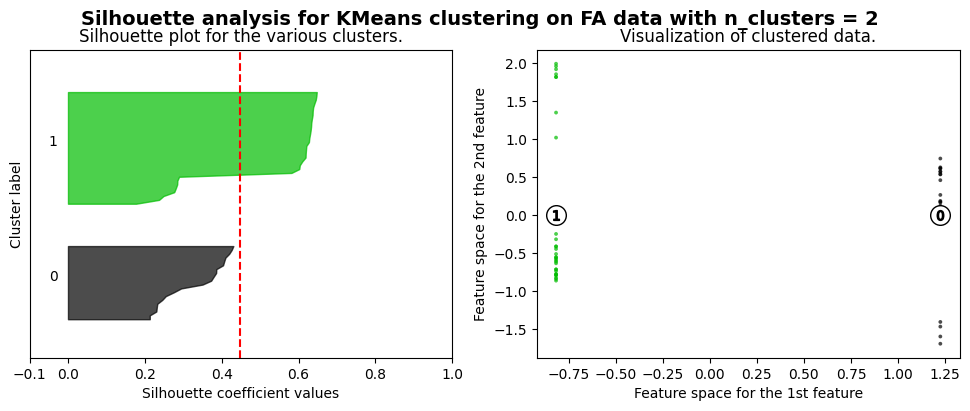

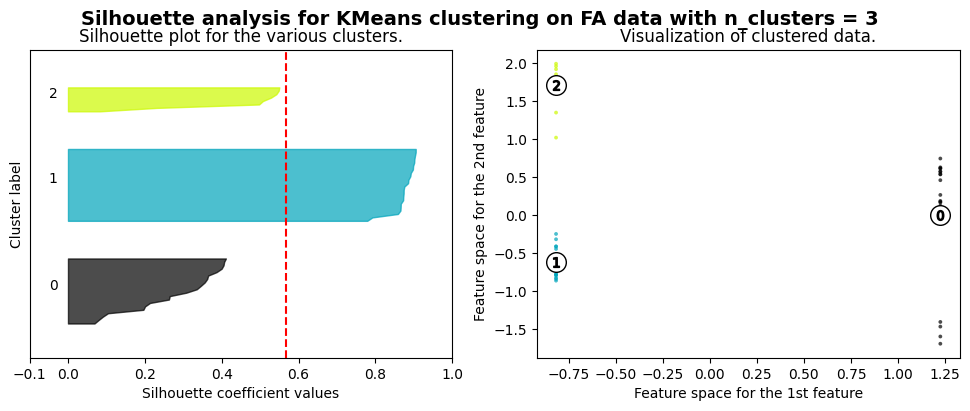

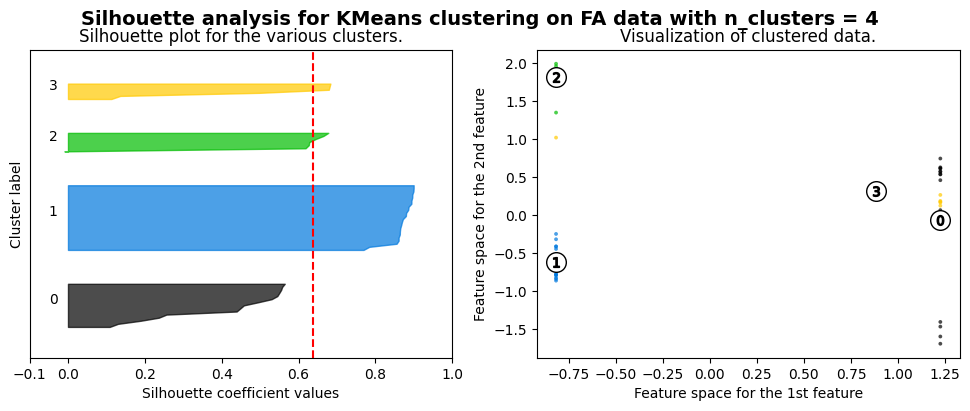

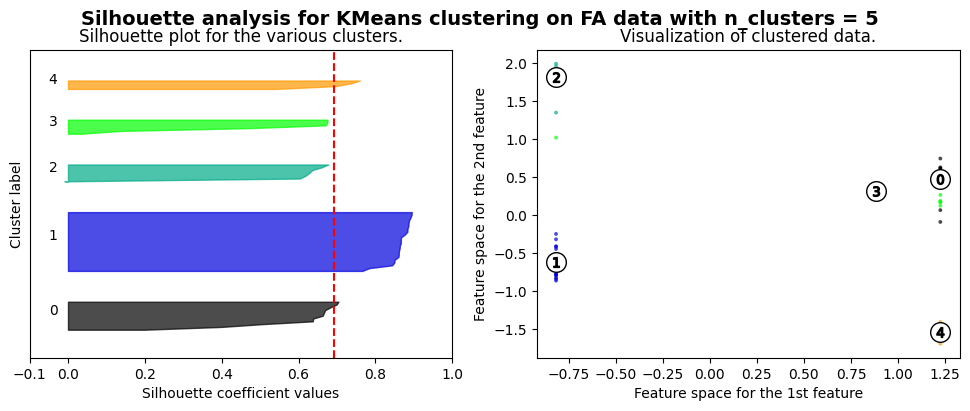

In [50]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_fa) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_fa)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_fa, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_fa, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_fa[:, 0], X_fa[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on FA data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

In [51]:
from scipy.stats import bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Perform Bartlett’s Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(tones_encoded)
print(f'Chi-Square Value: {chi_square_value}, p-value: {p_value}')

Chi-Square Value: 12229.242432546507, p-value: 0.0


In [52]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Calculate KMO measure
kmo_all, kmo_model = calculate_kmo(tones_encoded)
print("KMO Measure:")
print(kmo_model)


KMO Measure:
0.22916317240921574


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


### KMeans FA Cluster Classification

In [53]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
cluster_labels_fa = kmeans.fit_predict(X_fa)

In [54]:
X_fa

array([[ 1.22474487, -0.09049852, -0.44702429],
       [-0.81649658, -0.63602609,  0.10430954],
       [ 1.22474487, -1.69640731, -0.42341664],
       [-0.81649658, -0.84200773,  0.0385233 ],
       [-0.81649658, -0.74007094, -0.09775441],
       [ 1.22474487,  0.6119432 , -0.1235256 ],
       [-0.81649658, -0.78113115,  0.02912727],
       [-0.81649658,  1.02140233,  2.40770687],
       [-0.81649658, -0.86463308,  0.13338339],
       [-0.81649658, -0.77985196, -0.07562328],
       [-0.81649658, -0.59899038,  0.05333665],
       [-0.81649658, -0.57674409,  0.20054295],
       [-0.81649658,  1.85708902, -0.60194669],
       [-0.81649658, -0.71605501, -0.19506548],
       [-0.81649658, -0.79753143, -0.24015921],
       [-0.81649658, -0.51317729,  0.06377726],
       [ 1.22474487,  0.18653068,  1.43087273],
       [-0.81649658, -0.24888386, -0.27064695],
       [ 1.22474487,  0.61843722, -1.16788141],
       [-0.81649658, -0.61433269, -0.112602  ],
       [-0.81649658,  1.82000571, -0.797

In [55]:
fa_graphs = df.copy()
fa_graphs['cluster'] = cluster_labels_fa

### Melt Data for column reduction

In [56]:
# Define columns to keep as identifiers (non-melted columns)
id_vars = fa_graphs.columns.difference(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'])

# Melt dataframe
fa_graphs = pd.melt(fa_graphs, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
fa_graphs.drop('variable',axis=1, inplace=True)

### FA Final Dataset

In [57]:
fa_graphs.head(3)

,age,cluster,disability,education,employment,ethnicity,gender,income,language,marital_status,race,tone
0,45-54,0,i do not have a disability,High School,Employed Part time,non hispanic,female,"$25,000 - $49,999",both,na,native american,Persuasive
1,18-24,1,i do not have a disability,High School,Employed Part time,hispanic,male,"Less than $25,000",english,single,white,Original
2,25-34,0,i do not have a disability,Associate,Student,non hispanic,female,"Less than $25,000",english,single,multiracial,Original


In [58]:
# fa_graphs.to_excel('fa-dem-based-clusters.xlsx', index=False)

## PCA Dimensionality Reduction

In [59]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)

For n_clusters = 2, the average silhouette score is: 0.409499608650353
For n_clusters = 3, the average silhouette score is: 0.4995897943231211
For n_clusters = 4, the average silhouette score is: 0.3331530545948454
For n_clusters = 5, the average silhouette score is: 0.3925052375659537


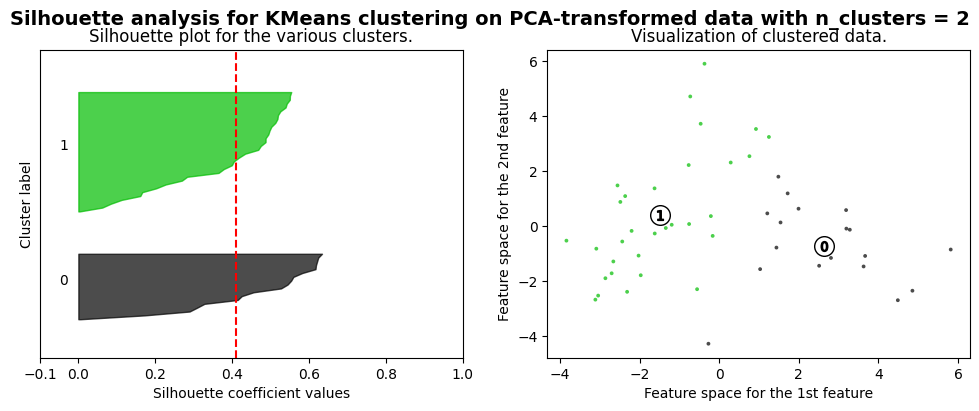

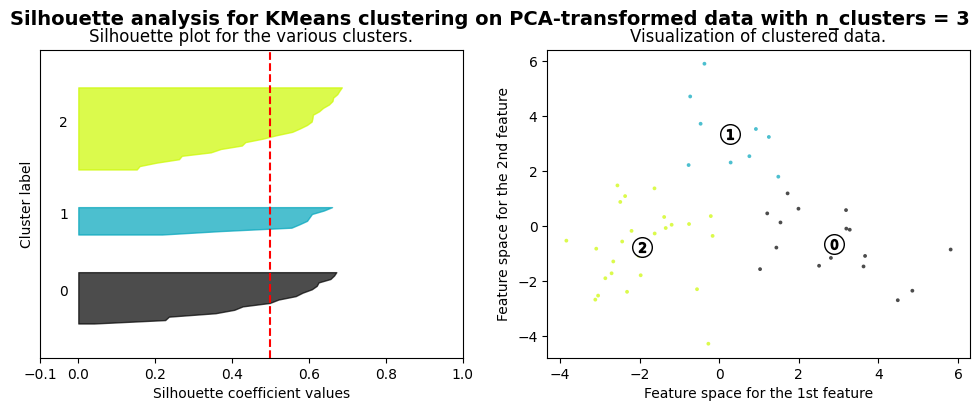

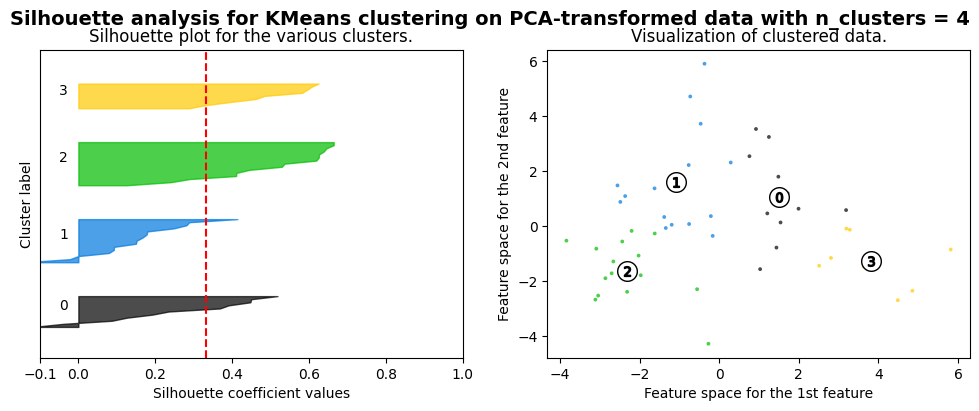

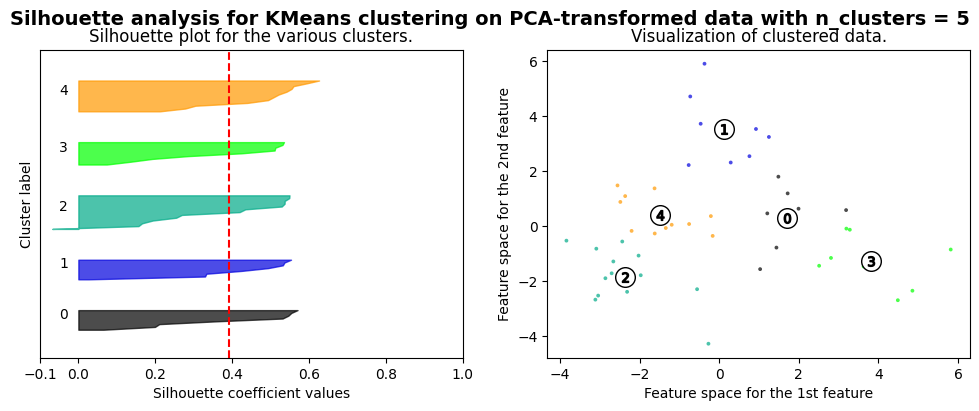

In [60]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on PCA-transformed data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file if needed
    # plt.savefig(f'silhouette_analysis_n_clusters_{n_clusters}.png')

plt.show()

In [61]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

In [62]:
pca_graphs = df.copy()
pca_graphs['cluster'] = cluster_labels_pca

In [63]:
# Melt dataframe
pca_graphs = pd.melt(pca_graphs, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
pca_graphs.drop('variable',axis=1, inplace=True)

In [64]:
pca_graphs.head(2)

,age,cluster,disability,education,employment,ethnicity,gender,income,language,marital_status,race,tone
0,45-54,2,i do not have a disability,High School,Employed Part time,non hispanic,female,"$25,000 - $49,999",both,na,native american,Persuasive
1,18-24,2,i do not have a disability,High School,Employed Part time,hispanic,male,"Less than $25,000",english,single,white,Original


In [65]:
# pca_graphs.to_excel('pca-dem-based-cluster.xlsx', index=False)

In [68]:
from sklearn.manifold import TSNE

# Fit t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(scaled)



For n_clusters = 2, the average silhouette score is: 0.37928420305252075
For n_clusters = 3, the average silhouette score is: 0.4468456208705902
For n_clusters = 4, the average silhouette score is: 0.4380246102809906
For n_clusters = 5, the average silhouette score is: 0.40023180842399597


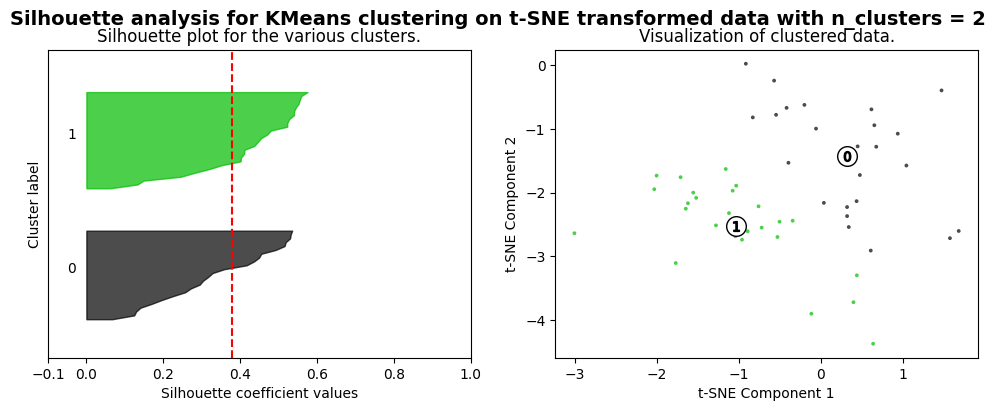

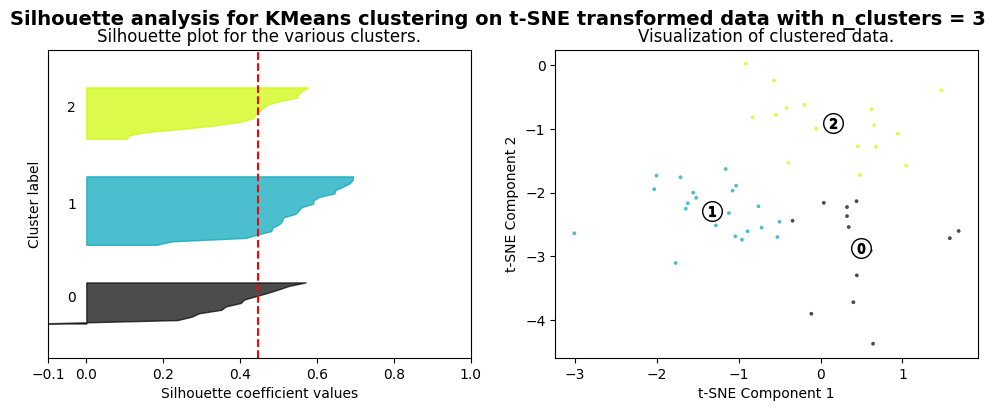

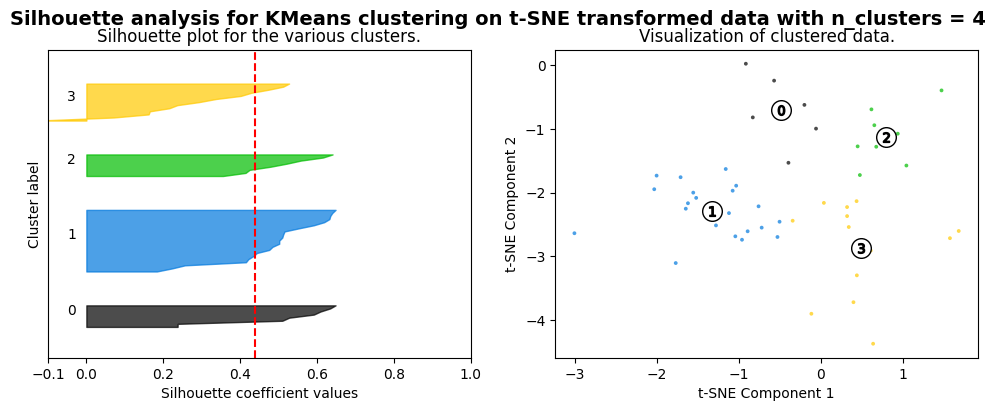

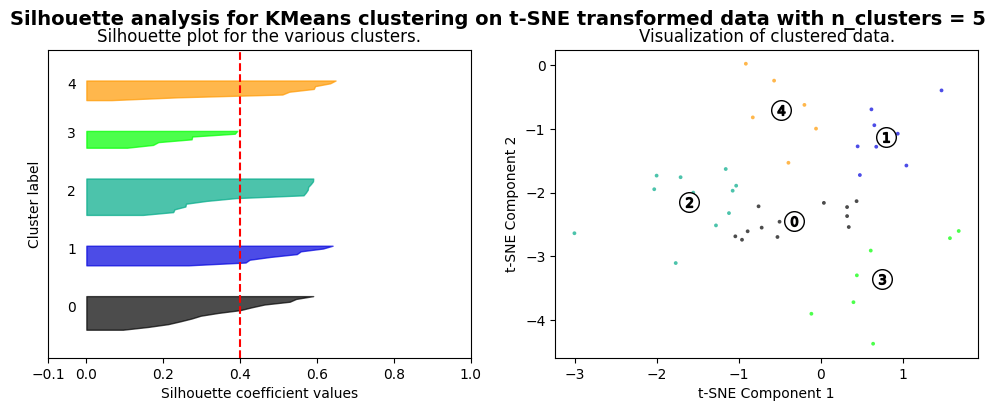

In [69]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_tsne) + (n_clusters + 1) * 10])

    # Initialize KMeans object and fit to data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_tsne)

    # Compute silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Vertical line for average silhouette score of all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("t-SNE Component 1")
    ax2.set_ylabel("t-SNE Component 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on t-SNE transformed data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [75]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_tsne = kmeans.fit_predict(X_tsne)

In [80]:
tsne_graphs =  df.copy()

In [81]:
tsne_graphs['cluster'] = cluster_labels_tsne

In [82]:
# Melt dataframe
tsne_graphs = pd.melt(tsne_graphs, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
tsne_graphs.drop('variable',axis=1, inplace=True)

In [83]:
tsne_graphs.head(2)

,age,cluster,disability,education,employment,ethnicity,gender,income,language,marital_status,race,tone
0,45-54,3,i do not have a disability,High School,Employed Part time,non hispanic,female,"$25,000 - $49,999",both,na,native american,Persuasive
1,18-24,1,i do not have a disability,High School,Employed Part time,hispanic,male,"Less than $25,000",english,single,white,Original


In [84]:
# tsne_graphs.to_excel('tsne-dem-based-clusters.xlsx')